# Data 1a Exploratory Data Analysis

## Data Understanding 

This dataset gives us predictions of the future plastic leakage for 15 different regions. According to OECD.stat, “Plastic leakages to aquatic environments and the subcategory transport to oceans are estimated by applying the methodology adapted from Lebreton and Andrady (2019), on OECD ENV-Linkages model outputs and plastic leakage from mismanaged and litter." I have cleaned this data to only include the ocean data - NOT freshwater data. 

This data consists of categorical and numerical data. The categorical data is location and water source and the numerical data is time and values (tonnes).

This data is crucial to my project as it shows what may happen if time is not invested into ocean sustainability, specifically, when it comes to plastic leakage. 

It is important to note that location is split up into the following 15 unique values. OECD stands for Organization for Economic Co-operation and Development. 38 countries are currently members of the OECD. Listed below are the locations used in the dataset. 

- OECD Non-EU
- Other OECD America 
- Other Africa
- Other Eurasia
- Latin America
- OECD Asia
- United States
- Other non-OECD Asia
- Middle East & North Africa
- China
- OECD EU
- Other EU
- OECD Oceania
- Canada 
- India

## Descriptive Statistics 

In [3]:
# Importing Data
import pandas as pd
data1a = pd.read_csv(
    '/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/cleandata1a.csv')

# Summary Statistics
data1a[["Value"]].describe()

,Value
count,630.000000
mean,34.537254
std,38.067211
min,0.211856
25%,8.962933
50%,21.689714
75%,45.564320
max,219.560846


These summary statistics help us better understand our dataset. It is most important to take into account the number for the mean - 34.54. This number tells us the average million tonnes of plastic that will be leaked into the ocean each year from each location. It is also notable to look at the max - 219.56. This is the estimated value a location will leak into the ocean in **one** year.

## Data Visualization

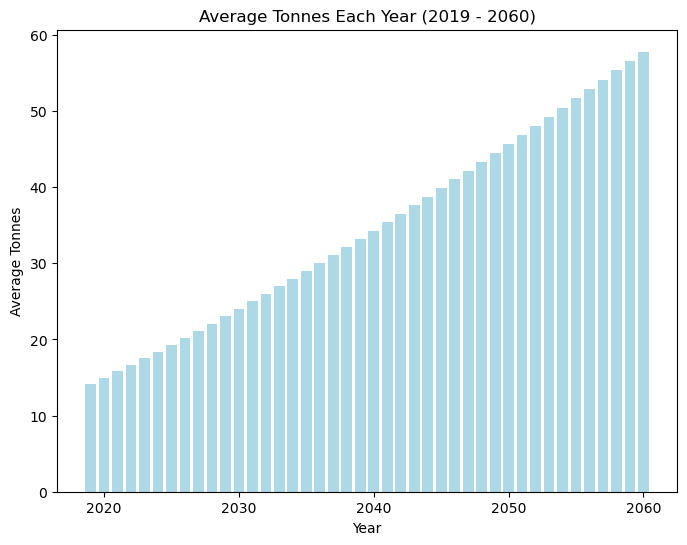

In [5]:
import matplotlib.pyplot as plt

#average Tones by Year
average_tonnes = data1a.groupby("Time")["Value"].mean()

# Bar Chart - Average Tonnes Each Year
plt.figure(figsize=(8, 6))
plt.bar(average_tonnes.index, average_tonnes.values, color='#ADD8E6')
plt.xlabel("Year")
plt.ylabel("Average Tonnes")
plt.title("Average Tonnes Each Year (2019 - 2060)")
plt.show()

Location
Other non-OECD Asia           5219.555210
China                         3171.411114
Other Africa                  2683.444158
Latin America                 2184.368092
OECD EU                       1630.250955
United States                 1517.991740
India                         1431.290918
Middle East & North Africa    1388.940608
OECD Non-EU                    712.730233
Other OECD America             628.464360
OECD Asia                      578.911133
Other Eurasia                  332.924609
Canada                         222.498466
Other EU                        32.281595
OECD Oceania                    23.406731
Name: Value, dtype: float64


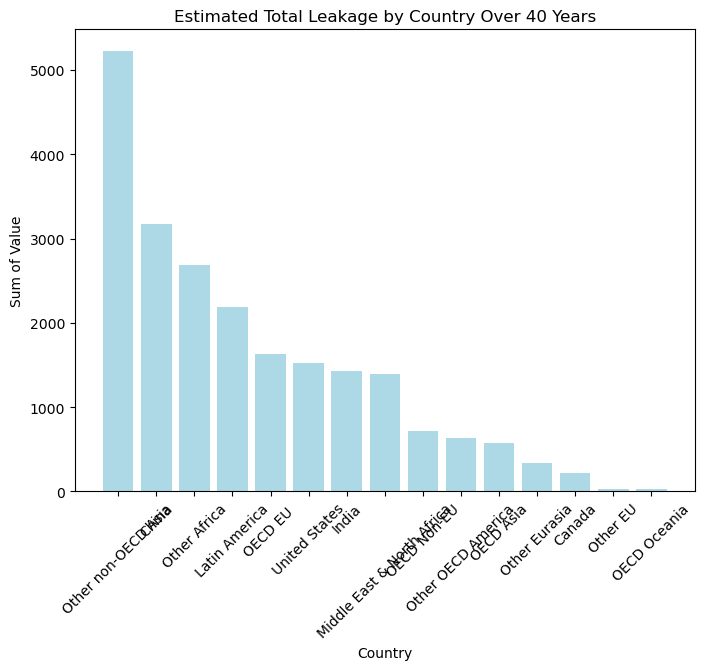

In [8]:
country_sum = data1a.groupby("Location")["Value"].sum()

# Bar Chart - Sum of Values for Each Location 
country_sum = country_sum.sort_values(ascending=False)
print(country_sum)
plt.figure(figsize=(8, 6))
plt.bar(country_sum.index, country_sum.values, color='#ADD8E6')
plt.xlabel("Country")
plt.ylabel("Sum of Value")
plt.title("Estimated Total Leakage by Country Over 40 Years")
plt.xticks(rotation=45)
plt.show()


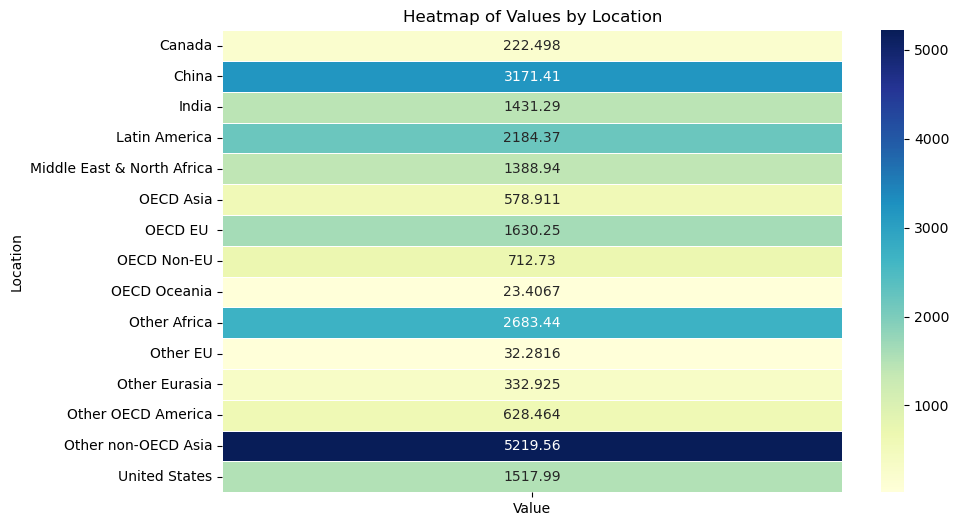

In [12]:
#HeatMap
import seaborn as sns
heatmap_data = data1a.pivot_table(index="Location", values="Value", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g', cbar=True, linewidths=0.5)
plt.title("Heatmap of Values by Location")
plt.show()
# Darker Colors = Higher SUM

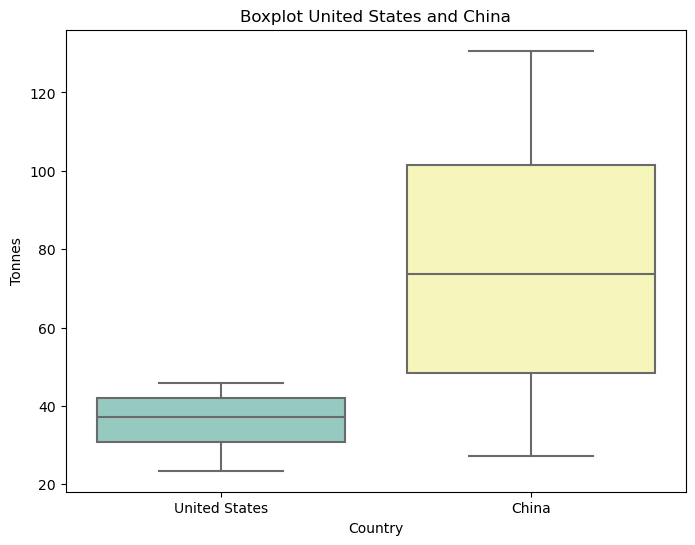

In [13]:

#Filtering Data to just show United States and China
selected_countries = ["United States", "China"]
filtered_df = data1a[data1a["Location"].isin(selected_countries)]

#Boxplot of United States and China Values 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Location", y="Value", data=filtered_df, palette="Set3")
plt.xlabel("Country")
plt.ylabel("Tonnes")
plt.title("Boxplot United States and China")
plt.show()

## Correlation Analysis

In [24]:
#Correlation Matrix
correlation_matrix = data1a[["Time", "Value"]].corr()
print(correlation_matrix)

           Time     Value
Time   1.000000  0.341206
Value  0.341206  1.000000



Below I have included the correlation matrix. A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. I looked at the relationship between time and value (tonnes). 

The correlation coefficient between "Time" and "Time" is 1.0. This makes sense as a corelation with itself will equal 1.0 also known as a perfect correlation. 

The correlation coefficient between "Time" and "Value" is approximately 0.3412. This value suggests a positive correlation between "Time" and "Value".

## Identifying Outliers

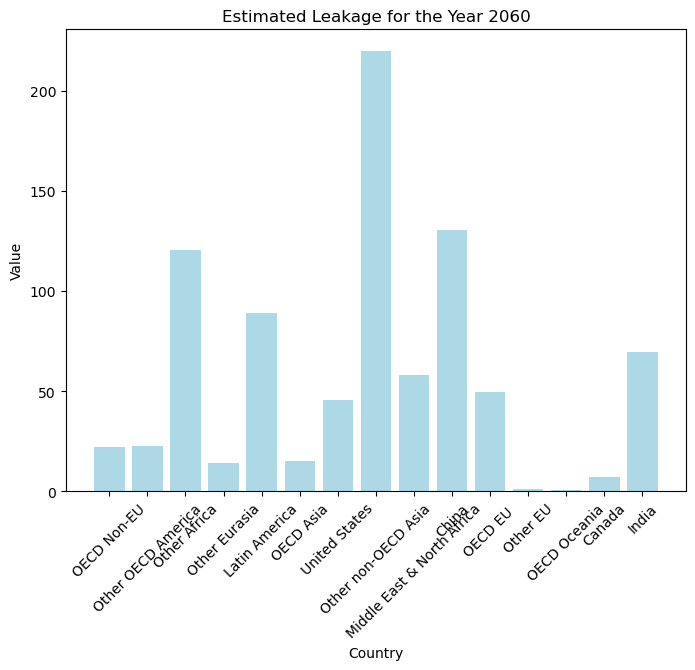

In [25]:
#Possible Outliers in 2060
data_2060 = data1a[data1a["Time"] == 2060]
plt.figure(figsize=(8, 6))
plt.bar(data_2060["Location"], data_2060["Value"], color='#ADD8E6')
plt.xlabel("Country")
plt.ylabel("Value (Tonnes)")
plt.title("Estimated Leakage for the Year 2060 by Location")
plt.xticks(rotation=45)
plt.show()

Within this dataset I am techniclly looking at only one numerical value that will help me answer my overall question 
(Value). 

To identify possible outliers in the future, I created a bar graph to show which location will have the highest leakeage in the year 2060. 

It is clear that the United States will have a significantly higher amount of plastic leakage into the ocean.

## Methods and Findings

Overall, this dataset helps me answer my overall question on why ocean sustainability is necessary. This dataset allows viewers to understand that if action is not taken, the plastic leakage throughout the world will continue to increase. 

A few key takeaways from the data visualitions created are:

- The average tonnes per year across the world will continue to increase
- Countries in Asia that are not part of the OECD are estimated to have the highest plastic leakage numbers in 2060
- China and the United States also have high numbers when it comes to the total estimated amount of leakage in 2060
- There is a positive correlation between time and tonnes, which makes sense

Overall, although this dataset was relatively simple, it helps answer the question of why humans need to focus on sustainability if they dont want to end up with millions of tonnes of plastics in our oceans. 